In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from astropy import table
from scipy.optimize import curve_fit
import random
from fonctions_maison import *
import mpl_toolkits.mplot3d as mp3d

Importer les données

In [69]:
x_fond_d1, y_fond_d1 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D0_B.txt", unpack = True)
x_fond_d2, y_fond_d2 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D1_B.txt", unpack = True)
x_fond_d3, y_fond_d3 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D2_B.txt", unpack = True)
x_fond_d4, y_fond_d4 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D3_B.txt", unpack = True)
x_fond_d5, y_fond_d5 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D4_B.txt", unpack = True)
x_fond_d6, y_fond_d6 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D5_B.txt", unpack = True)
x_fond_d7, y_fond_d7 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D6_B.txt", unpack = True)
x_fond_d8, y_fond_d8 = np.loadtxt("Données/images_lab/gauss_rouge_fond_D7_B.txt", unpack = True)

x_array = ([x_fond_d1, x_fond_d2, x_fond_d3, x_fond_d4, x_fond_d5, x_fond_d6, x_fond_d7, x_fond_d8])
y_array = ([y_fond_d1, y_fond_d2, y_fond_d3, y_fond_d4, y_fond_d5, y_fond_d6, y_fond_d7, y_fond_d8])


OSError: Données/images_lab/gauss_rouge_fond_D0_B.txt not found.

In [17]:
def gauss1(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [28]:
def ouverture_num(x, y):
    
    np.pixel = 5.2e-6 #m
    
    D=np.arange(0, len(x), 1)*(1/30)*(25.4e-3)+16.5e-3 #Distance entre caméra et fibre optique. D est gradué en dixième de pouce
    
    R_optique=[]
    
    for i in range(len(D)):
        
        x_reel = np.pixel*x[i] #Transforme du nombre de np.pixels en distance
        #Fit
        y_fit, p_opt, p_err = fit_gaussien(x_reel, y[i], p0 = [10,50,0.0025,0.0001], show = True)
        #plt.plot(x_test, y_fit)

        cinq_pourcent = find_max(y_fit-p_opt[0])*0.05 #5% du max sans le offset H de la gaussienne
        x_wide = np.np.linspace(-x_reel[-1], x_reel[-1]*2, 10000) #agrandissment de x pour s'assurer de trouver le 5%
        y_fit_wide = gauss1(x_wide, p_opt[0], p_opt[1], p_opt[2], p_opt[3]) #fit le x_wide
        
        x_limite = x_wide[find_nearest(y_fit_wide-p_opt[0], cinq_pourcent)] #Valeur de x à 5% du max
        R_optique.append( np.abs( x_limite - p_opt[2] ) ) #Calcul du rayon optique
        
        #print(x_limite)
    
    
    y_fit, p_opt, p_err = reg_lin(D,R_optique, show = True) #Relation entre R_optique et D
    
    print(D)
    print(R_optique)
    
    return 
    

In [13]:
def V_th(na):
    
    R=[1.75e-6, 2.2e-6, 1.8e-6] #Rayon des coeurs de fibre monomode
    lamda=[405e-9,515e-9,532e-9,632.8e-9,] #nm

    
    for laser in lamda:
        for coeur in R:
            k=2*np.pi/laser #nombre d'onde
            V=k*coeur*na #V
            print("Pour laser à {} nm et R = {}, V = {}".format(laser,coeur,V))
            
    return 


In [17]:
#V_th(0.00146,0.0165)
V_th(0.13)

Pour laser à 4.05e-07 nm et R = 1.75e-06, V = 3.529443598477422
Pour laser à 4.05e-07 nm et R = 2.2e-06, V = 4.437014809514474
Pour laser à 4.05e-07 nm et R = 1.8e-06, V = 3.6302848441482056
Pour laser à 5.15e-07 nm et R = 1.75e-06, V = 2.7755818589968073
Pour laser à 5.15e-07 nm et R = 2.2e-06, V = 3.4893029084531295
Pour laser à 5.15e-07 nm et R = 1.8e-06, V = 2.854884197825288
Pour laser à 5.32e-07 nm et R = 1.75e-06, V = 2.686888453728112
Pour laser à 5.32e-07 nm et R = 2.2e-06, V = 3.377802627543913
Pour laser à 5.32e-07 nm et R = 1.8e-06, V = 2.763656695263201
Pour laser à 6.328e-07 nm et R = 1.75e-06, V = 2.2588885230457585
Pour laser à 6.328e-07 nm et R = 2.2e-06, V = 2.8397455718289533
Pour laser à 6.328e-07 nm et R = 1.8e-06, V = 2.32342819513278


H = 6.049479770895818 +/- 0.041468222873960056, A = 60.89039115027781 +/- 0.06905851164661056, x0 = 0.0023470006754625302 +/- 7.093717431004777e-07, sigma = 0.0005985642148764317 +/- 9.132531819952751e-07


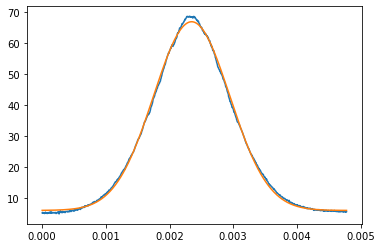

H = 5.859617124237624 +/- 0.04155737969727916, A = 63.0909324983631 +/- 0.06848650565905705, x0 = 0.0024712325765918236 +/- 7.084860358789899e-07, sigma = 0.0006260934086893779 +/- 9.167267506816387e-07


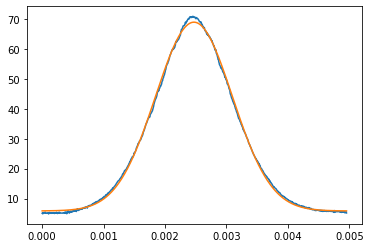

H = 6.157006429801486 +/- 0.04309015648031644, A = 61.34266953662952 +/- 0.06589540572088094, x0 = 0.0024445375186276552 +/- 7.224862303415186e-07, sigma = 0.0006578788416400875 +/- 9.717023198560314e-07


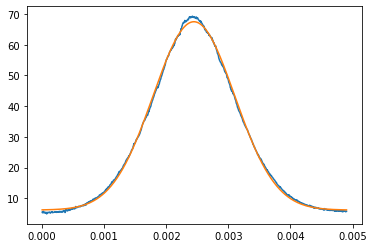

H = 6.408233195915808 +/- 0.04777000301337106, A = 59.77335159714908 +/- 0.06341030307211878, x0 = 0.0021786061751283615 +/- 7.055608184865401e-07, sigma = 0.0006861879474345977 +/- 1.0361297435497404e-06


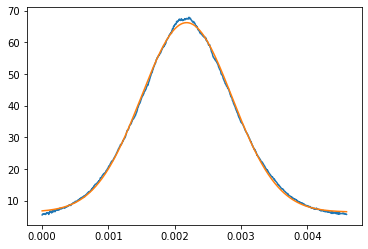

H = 5.9151657411317915 +/- 0.03637869082315741, A = 54.15125220997884 +/- 0.05521132501223682, x0 = 0.0026479928867566395 +/- 7.583033923588752e-07, sigma = 0.0007291596358761392 +/- 1.0241167389124345e-06


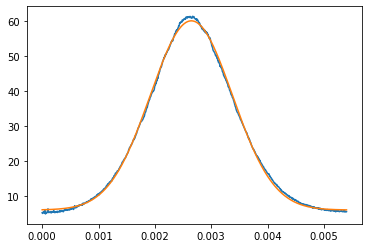

H = 6.107027944735404 +/- 0.03664701936342317, A = 50.02052367579724 +/- 0.05149741179023624, x0 = 0.0025967222518094493 +/- 7.817678579629786e-07, sigma = 0.000764146364699165 +/- 1.105417317135518e-06


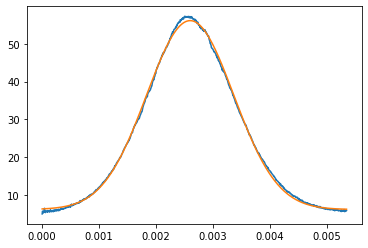

H = 5.701933237561151 +/- 0.030441199786866595, A = 47.06592399461642 +/- 0.03837099161985858, x0 = 0.0027250101404293447 +/- 6.589421236410923e-07, sigma = 0.0008558940599213135 +/- 1.0068521940379071e-06


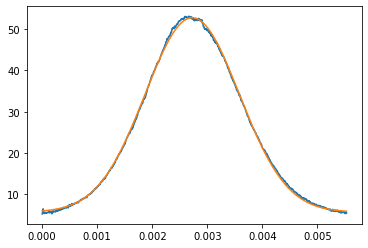

H = 5.564700926200978 +/- 0.031524642170621335, A = 46.21332289439848 +/- 0.03936778164750905, x0 = 0.002762000354670295 +/- 7.117404310183118e-07, sigma = 0.0008900076256936471 +/- 1.0953579542935076e-06


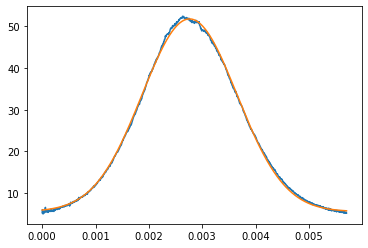

a = 0.12215851039841641 +/- 0.009310423206752592 et b = -0.0006004434669980894 +/- 0.0001821097786336074


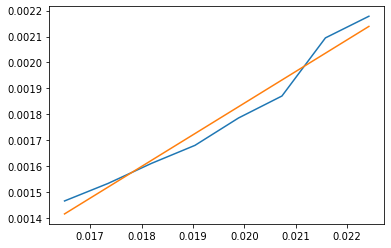

[0.0165     0.01734667 0.01819333 0.01904    0.01988667 0.02073333
 0.02158    0.02242667]
[0.0014652238977847618, 0.0015327970663724729, 0.0016103517400497974, 0.0016799085453653852, 0.0017854478573177696, 0.0018704350239181228, 0.0020948007194872506, 0.0021783818728221094]


In [30]:
#na = V_th(x_array,y_array)

y_fit,_,__ = ouverture_num(x_array, y_array) #Calcul de l'ouverture numérique


## Bonus

Simulation d'harmoniques sphériques

3D_l=2_m=1.jpg


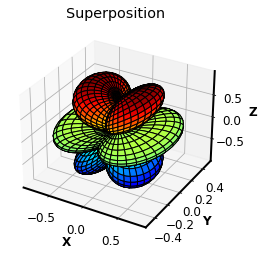

xz_l=2_m=1.jpg


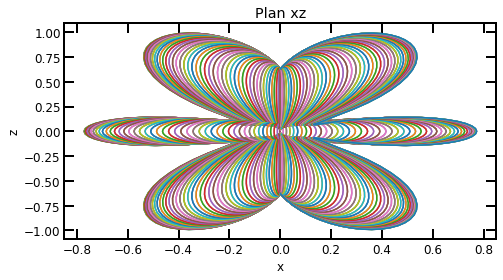

xy_l=2_m=1.jpg


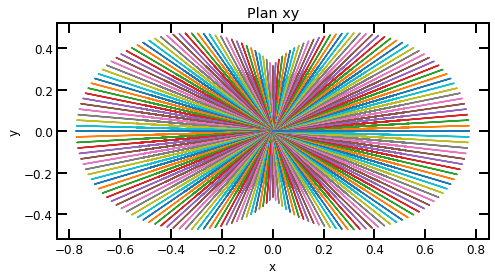

yz_l=2_m=1.jpg


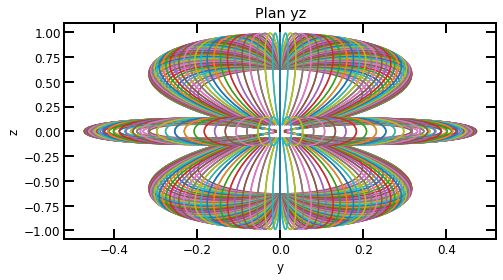

In [26]:
from math import factorial

def Shperical2Cartesian(r, theta, phi):

    x = r* np.sin(theta)* np.cos(phi)
    y = r* np.sin(theta)* np.sin(phi)
    z = r* np.cos(theta)
    
    return x, y, z

# Polynômes de Legendre

def poly_legend(l, m, x):
    pmm = 1.0
    if m > 0:
        sign = 1.0 if m % 2 == 0 else -1.0
        pmm = sign * pow( factorial(2 * m - 1) * (1.0 - x * x), ((m / 2)) )

    if l == m:
        return pmm

    pmm1 = x * (2 * m + 1) * pmm
    if l == m + 1:
        return pmm1

    for n in range(m + 2, l + 1):
        pmn = (x * (2 * n - 1) * pmm1 - (n + m - 1) * pmm) / (n - m)
        pmm = pmm1
        pmm1 = pmn

    return pmm1


l = int(input('Nombre azimuthal "l": '))

if l < 0:
    print('"l" doit être positif')

m = int(input('Nombre magnétique "m": '))

if m > l or m < (-l):
    print('Nombre "m" doit être dans intervalle "[-l,l]"')

# Constante de normalisation

K = np.sqrt( ((2*l + 1)* factorial(l - abs(m)))/ (4* np.pi* factorial(l + abs(m))) )

# Angles phi et theta

phi = np.linspace(0, 2* np.pi, 181)
tht = np.linspace(0, np.pi, 91)

Phi, Tht = np.meshgrid(phi, tht)

# Harmonique sphériques Y 

p, q = np.shape(Phi)
Y    = np.zeros([p, q])

for i in range(0, p):
    for j in range(0, q):

        if m > 0:
        
            Y[i, j] = np.sqrt(2) * K * np.cos(m * Phi[i, j]) * poly_legend(l, m, np.cos(Tht[i, j]))
        
        elif m < 0:
        
            Y[i, j] = np.sqrt(2) * K * np.sin(abs(m) * Phi[i, j]) * poly_legend(l, abs(m), np.cos(Tht[i, j]))
        
        else:
        
            Y[i, j] = K * poly_legend(l, 0, np.cos(Tht[i, j]))


# Attention aux Y négatifs
p, q = np.shape(Y)

#%% On change le résulat en coordonnées cartésiennes

x, y, z = Shperical2Cartesian(abs(Y), Tht, Phi)
# x = x1+x2
# y = y1+y2
# z = z1+z2
#plotting

#3D
fig = plt.figure('Harmoniques sphériques')
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'jet', edgecolor = 'k')

plt.axis('auto')
plt.title('l = {}, m = {}'.format(l,m), fontsize = 14, fontweight = 'bold')
#plt.title("Superposition")
ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')
print("3D_l={}_m={}.jpg".format(l,m))
plt.show()

#Plan x-z
beau_graphique()
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Plan xz")
print("xz_l={}_m={}.jpg".format(l,m))
plt.show()

#Plan x-y
beau_graphique()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plan xy")
print("xy_l={}_m={}.jpg".format(l,m))
plt.show()

#Plan y-z
beau_graphique()
plt.plot(y,z)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Plan yz")
print("yz_l={}_m={}.jpg".format(l,m))
plt.show()